Emma Klemets, Nov 2022   
To investigate if we have aligned the old and new data properly.   
I am looking only at linear shifts in x and y in the data (z really shouldn't be off more than a couple cm), and checking rotations is quite hard, and we are pretty confident that there is no rotation of the coords between these two data sets.

I am shifting the 2019 data, as we are less confident of this coord system, and then subtracting the 2022 results from this data. A shift of $x=+20$ cm, means 20 cm is added to the orginal x coordinates of the 2019 data.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import sys, os
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter

sys.path.insert(1, '../PrettyPlotTools/')
import ParticlePlottingFunctions as ppf
import seaborn as sns

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

file_22 = "data_export/map_referencedMSR_fall2022_together_interp50.txt"
data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

file_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp50.txt"
data_19 = pd.read_csv(file_19, comment='#', sep='\t', names=colNames)

In [18]:
cut_22 = "data_export/map_referencedMSR_fall2022_together_CUT_interp50.txt"
dataCut_22 = pd.read_csv(cut_22, comment='#', sep='\t', names=colNames)

#the data in this file for the B field is 
cut_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp_CUT_interp50.txt"
dataCut_19 = pd.read_csv(cut_19, comment='#', sep='\t', names=colNames)

In [19]:
mins_19 = np.min(dataCut_19)
max_19 = np.max(dataCut_19)

mins_22 = np.min(dataCut_22)
max_22 = np.max(dataCut_22)

print("2019 limits:")
print(mins_19,'\n', max_19)
print("2022 limits:")
print(mins_22, '\n',max_22)

2019 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x   -103.579643
B_y    -79.578744
B_z   -256.526638
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x     -5.617606
B_y    -32.184553
B_z   -156.833015
dtype: float64
2022 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x    -94.285496
B_y    -94.418055
B_z   -263.919420
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x      5.140000
B_y    -28.791676
B_z   -160.995889
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [170]:
#loads all the file I have in this folder as STLs
shiftPath = '../MagMapping-export_TH_2019/data_export/shifts'
shiftfile_array = os.listdir(shiftPath)[:-1]
# print(shiftfile_array)

comparisonshifts = []
comparisonResults = []

for shiftfile in shiftfile_array:
    # print(shiftfile)
    filedata_2019 = f"{shiftPath}/{shiftfile}"
    shift = np.array(filedata_2019.split("[")[1].split("]")[0].split(",")).astype(float)
    # print(shift)    
    
    dataCut_19 = pd.read_csv(filedata_2019, comment='#', sep='\t', names=colNames)
    
    # list(dataCut_19.columns)

    df_compare = dataCut_19.join(dataCut_22, rsuffix='_22', how='outer')

    df_compare = df_compare.where((df_compare['x']==df_compare['x_22']) & 
                                          (df_compare['y']==df_compare['y_22']) &
                                          (df_compare['z']==df_compare['z_22']))

    df_compare = df_compare.drop(columns=['x_22', 'y_22', 'z_22'])

    df_compare['dB_x'] = df_compare['B_x'] - df_compare['B_x_22'] 
    df_compare['dB_y'] = df_compare['B_y'] - df_compare['B_y_22'] 
    df_compare['dB_z'] = df_compare['B_z'] - df_compare['B_z_22'] 
    
    df_compare['dB'] = np.sqrt(df_compare['dB_x']**2 + df_compare['dB_y']**2 +df_compare['dB_z']**2)
    
    means = df_compare.mean(axis=0)[['dB_x', 'dB_y', 'dB_z', 'dB']].values
    stds = df_compare.std(axis=0)[['dB_x', 'dB_y', 'dB_z', 'dB']].values
    
    comparisonshifts.append(shift)
    comparisonResults.append([means, stds])

comparisonshifts = np.array(comparisonshifts, dtype=object).T    
comparisonResults = np.array(comparisonResults, dtype=object).T

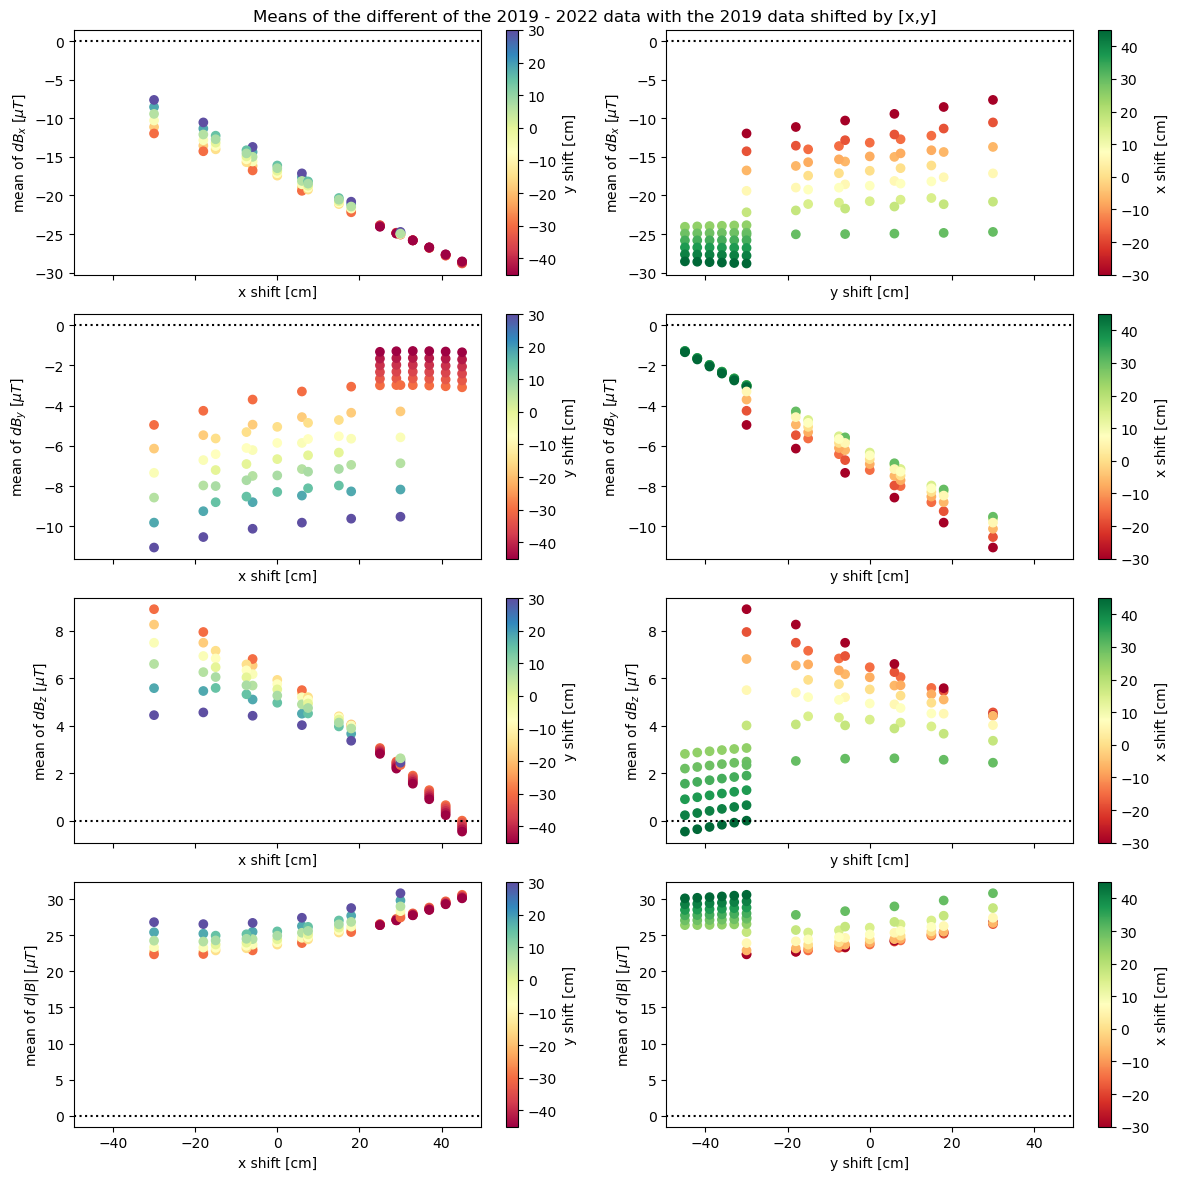

In [187]:
fig, ax2d = plt.subplots(4, 2, figsize=(12,12), sharex=True)
plt.suptitle("Means of the different of the 2019 - 2022 data with the 2019 data shifted by [x,y]")

axs = ax2d.flatten()
errors = False #to turn the error bars on, as they aren't great to look at

Q1 = axs[0].scatter(comparisonshifts[0], comparisonResults[0, 0, :], c=comparisonshifts[1], 
                    cmap='Spectral')
axs[0].set_xlabel('x shift [cm]')
axs[0].set_ylabel('mean of $dB_x$ [$\mu T$]')
cbar_y = plt.colorbar(Q1, ax=axs[0], label='y shift [cm]')
# cbar_y = plt.colorbar(Q1, ax=ax2d[:, 0], label='y shift [cm]',  shrink=0.6)

Q2 = axs[1].scatter(comparisonshifts[1], comparisonResults[0, 0, :], c=comparisonshifts[0], 
                    cmap='RdYlGn')
axs[1].set_xlabel('y shift [cm]')
axs[1].set_ylabel('mean of $dB_x$ [$\mu T$]')
cbar_x = plt.colorbar(Q2, ax=axs[1], label='x shift [cm]')

Q3 = axs[2].scatter(comparisonshifts[0], comparisonResults[1, 0, :], c=comparisonshifts[1], 
                    cmap='Spectral')
axs[2].set_xlabel('x shift [cm]')
axs[2].set_ylabel('mean of $dB_y$ [$\mu T$]')
cbar_y = plt.colorbar(Q3, ax=axs[2], label='y shift [cm]')

Q4 = axs[3].scatter(comparisonshifts[1], comparisonResults[1, 0, :], c=comparisonshifts[0], 
                    cmap='RdYlGn')
axs[3].set_xlabel('y shift [cm]')
axs[3].set_ylabel('mean of $dB_y$ [$\mu T$]')
cbar_x = plt.colorbar(Q4, ax=axs[3], label='x shift [cm]')

Q5 = axs[4].scatter(comparisonshifts[0], comparisonResults[2, 0, :], c=comparisonshifts[1], 
                    cmap='Spectral')
axs[4].set_xlabel('x shift [cm]')
axs[4].set_ylabel('mean of $dB_z$ [$\mu T$]')
cbar_y = plt.colorbar(Q5, ax=axs[4], label='y shift [cm]')

Q6 = axs[5].scatter(comparisonshifts[1], comparisonResults[2, 0, :], c=comparisonshifts[0], 
                    cmap='RdYlGn')
axs[5].set_xlabel('y shift [cm]')
axs[5].set_ylabel('mean of $dB_z$ [$\mu T$]')
cbar_x = plt.colorbar(Q6, ax=axs[5], label='x shift [cm]')

Q7 = axs[6].scatter(comparisonshifts[0], comparisonResults[3, 0, :], c=comparisonshifts[1], 
                    cmap='Spectral')
axs[6].set_xlabel('x shift [cm]')
axs[6].set_ylabel('mean of $d|B|$ [$\mu T$]')
cbar_y = plt.colorbar(Q7, ax=axs[6], label='y shift [cm]')

Q8 = axs[7].scatter(comparisonshifts[1], comparisonResults[3, 0, :], c=comparisonshifts[0], 
                    cmap='RdYlGn')
axs[7].set_xlabel('y shift [cm]')
axs[7].set_ylabel('mean of $d|B|$ [$\mu T$]')
cbar_x = plt.colorbar(Q8, ax=axs[7], label='x shift [cm]')

if errors:
    axs[0].errorbar(comparisonshifts[0], comparisonResults[0, 0, :], yerr=comparisonResults[0, 1, :], 
                 ls="", marker="", capsize=5)
    axs[1].errorbar(comparisonshifts[1], comparisonResults[0, 0, :], yerr=comparisonResults[0, 1, :], 
                 ls="", marker="", capsize=5)
    axs[2].errorbar(comparisonshifts[0], comparisonResults[1, 0, :], yerr=comparisonResults[1, 1, :], 
                 ls="", marker="", capsize=5)
    axs[3].errorbar(comparisonshifts[1], comparisonResults[1, 0, :], yerr=comparisonResults[1, 1, :], 
                 ls="", marker="", capsize=5)
    axs[4].errorbar(comparisonshifts[0], comparisonResults[2, 0, :], yerr=comparisonResults[2, 1, :], 
                 ls="", marker="", capsize=5)
    axs[5].errorbar(comparisonshifts[1], comparisonResults[2, 0, :], yerr=comparisonResults[2, 1, :], 
                 ls="", marker="", capsize=5)
    axs[6].errorbar(comparisonshifts[0], comparisonResults[3, 0, :], yerr=comparisonResults[3, 1, :], 
                 ls="", marker="", capsize=5)
    axs[7].errorbar(comparisonshifts[1], comparisonResults[3, 0, :], yerr=comparisonResults[3, 1, :], 
                 ls="", marker="", capsize=5)

axs[0].axhline(0, ls=":", color="black")
axs[1].axhline(0, ls=":", color="black")
axs[2].axhline(0, ls=":", color="black")
axs[3].axhline(0, ls=":", color="black")
axs[4].axhline(0, ls=":", color="black")
axs[5].axhline(0, ls=":", color="black")
axs[6].axhline(0, ls=":", color="black")
axs[7].axhline(0, ls=":", color="black")

plt.tight_layout()
plt.show()

In [188]:
shiftfile = "map_referencedMSR_shift[41.0,-33.0]_CUT_interp50.txt"

filedata_2019 = f"{shiftPath}/{shiftfile}"
shift = np.array(filedata_2019.split("[")[1].split("]")[0].split(",")).astype(float)
# print(shift)    

dataCut_19 = pd.read_csv(filedata_2019, comment='#', sep='\t', names=colNames)

# list(dataCut_19.columns)

df_compare = dataCut_19.join(dataCut_22, rsuffix='_22', how='outer')

df_compare = df_compare.where((df_compare['x']==df_compare['x_22']) & 
                                      (df_compare['y']==df_compare['y_22']) &
                                      (df_compare['z']==df_compare['z_22']))

df_compare = df_compare.drop(columns=['x_22', 'y_22', 'z_22'])

df_compare['dB_x'] = df_compare['B_x'] - df_compare['B_x_22'] 
df_compare['dB_y'] = df_compare['B_y'] - df_compare['B_y_22'] 
df_compare['dB_z'] = df_compare['B_z'] - df_compare['B_z_22'] 

means = df_compare.mean(axis=0)[['dB_x', 'dB_y', 'dB_z']].values
stds = df_compare.std(axis=0)[['dB_x', 'dB_y', 'dB_z']].values

print("mean (x,y,z): ", np.mean(df_compare['dB_x']), np.mean(df_compare['dB_y']), 
      np.mean(df_compare['dB_z']))
print("STD (x,y,z): ", np.std(df_compare['dB_x']), np.std(df_compare['dB_y']), 
      np.std(df_compare['dB_z']))

print("min (x,y,z): ", np.min(df_compare['dB_x']), np.min(df_compare['dB_y']), 
      np.min(df_compare['dB_z']))

print("max (x,y,z): ", np.max(df_compare['dB_x']), np.max(df_compare['dB_y']), 
      np.max(df_compare['dB_z']))

mean (x,y,z):  -27.76046223292362 -2.699090826409668 0.5846707896781865
STD (x,y,z):  4.936652013023243 7.138746683795763 7.498801709193311
min (x,y,z):  -48.428779265881985 -21.332415068364753 -19.53498128261799
max (x,y,z):  -9.435158971102851 46.6457372381498 35.491500223264865


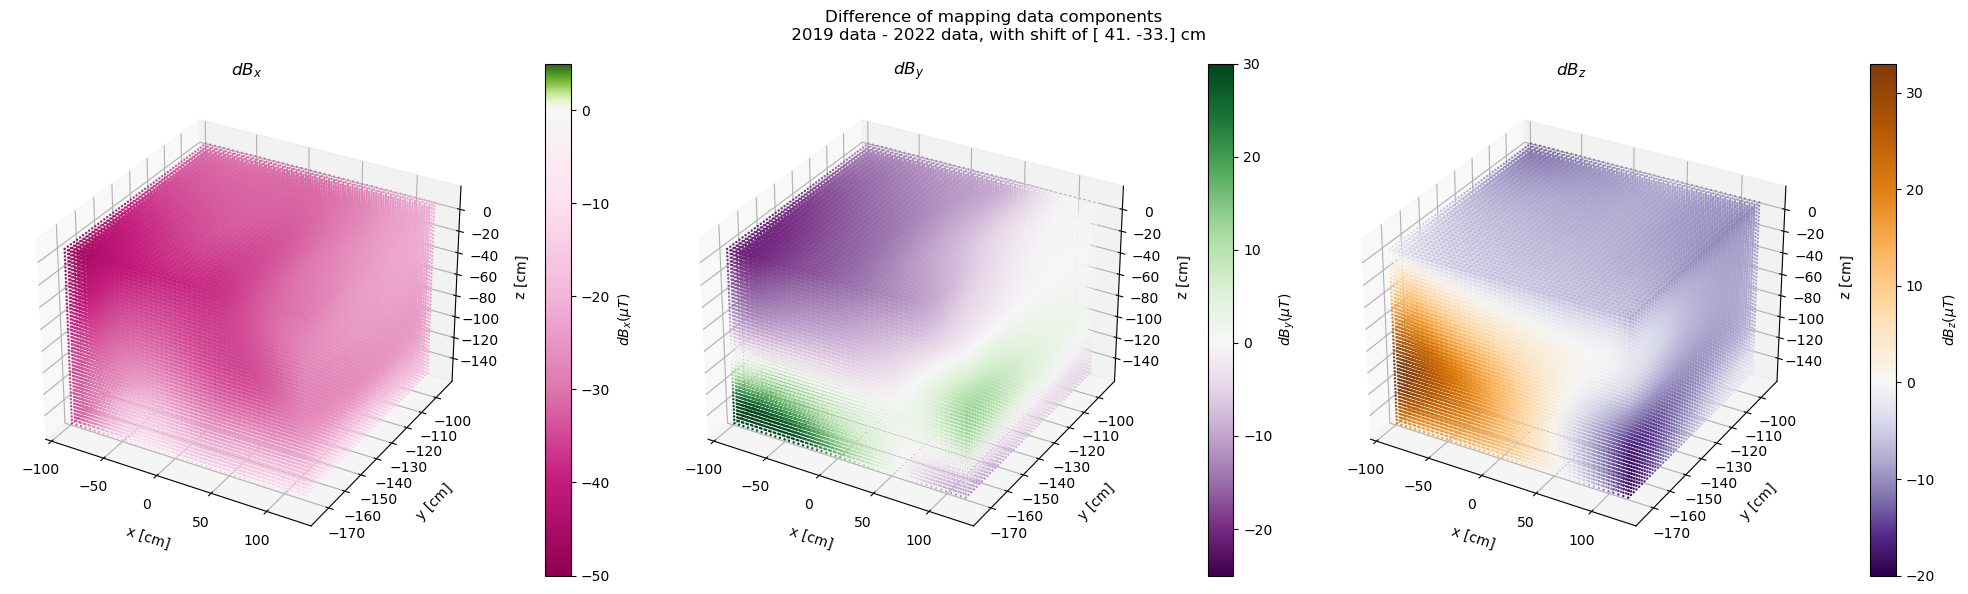

In [192]:
titleS = f"Difference of mapping data components \n 2019 data - 2022 data, with shift of {shift} cm"
limsA = [[-50, 5], [-25, 30], [-20, 33]]

ppf.PlotComponents(df_compare, Compare=True, lims=limsA, title=titleS, Sample=None)
# plt.savefig('plots/compare_3C.png', bbox_inches='tight')
plt.show()

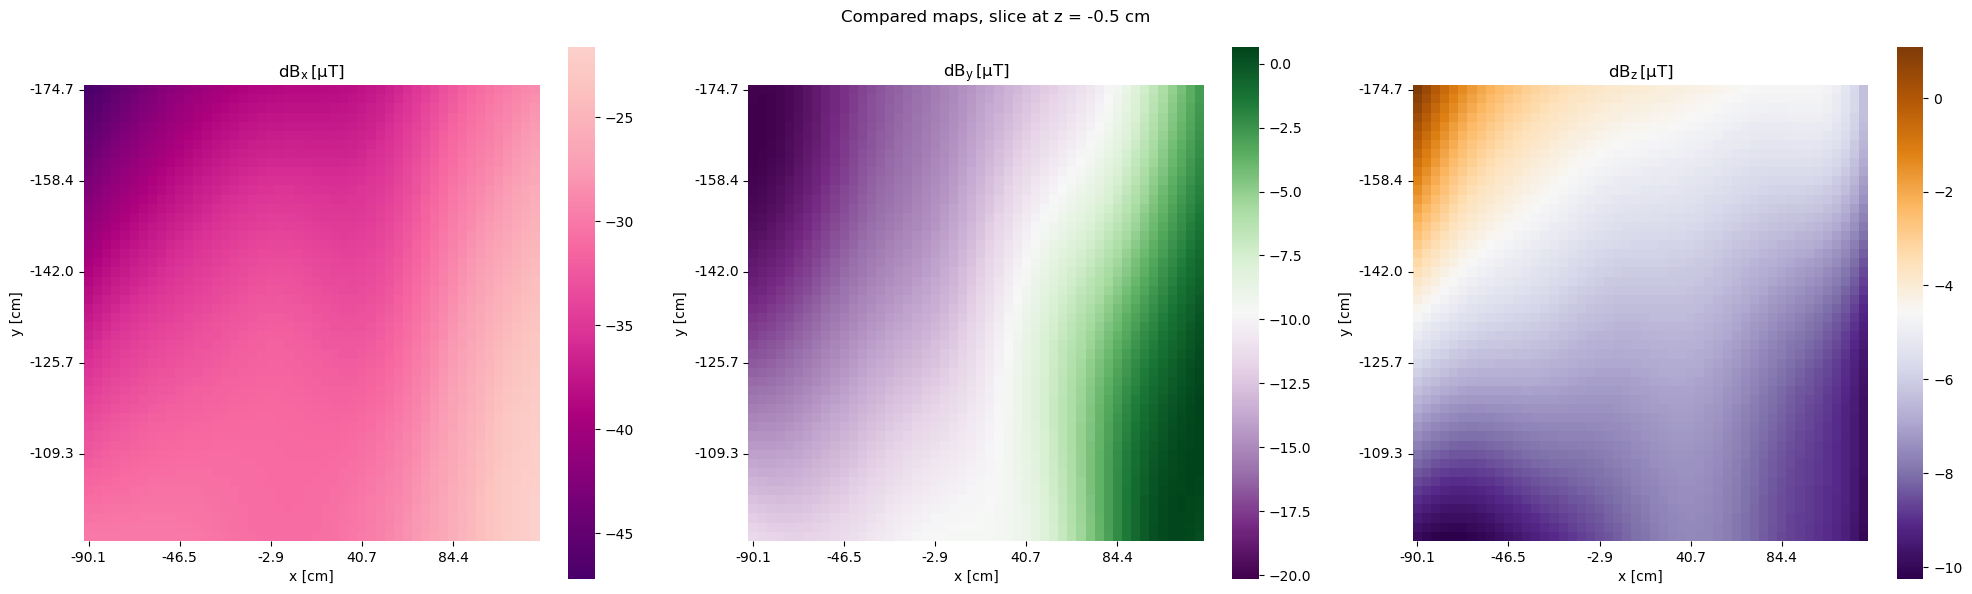

In [190]:
Xslice = df_compare['x'][0]
Zslice = 0#df_compare['z'][0]

# limsA = np.array([[-42, 42], [-50, 50], [-50, 50]])
ppf.PlotComponentsSliceHeat(df_compare, slicer=[None, None, Zslice], 
                    Compare=True, fsize=(20,6), lims=None, title="Compared maps")
plt.show()